In [1]:
import mxnet as mx
from mxnet import nd

In [2]:
nd.random.normal(0, 1, shape=(3, 4))
x = nd.arange(12).reshape((3, 4))
y = nd.arange(12).reshape((4 ,3))
z = nd.arange(9).reshape((3, 3))
before = id(z)
z += nd.dot(x, y)
print(before == id(z))
z

True



[[ 42.  49.  56.]
 [117. 140. 163.]
 [192. 231. 270.]]
<NDArray 3x3 @cpu(0)>

In [84]:
x = nd.arange(1)
x


[0.]
<NDArray 1 @cpu(0)>

In [105]:
from mxnet import autograd, nd
x = nd.arange(4).reshape((4, 1))

x.attach_grad()

with autograd.record():
    y = 2 * nd.dot(x.T,  x)
y.backward()

print(x)
print(x.grad)
print((x.grad - 4 * x).norm().asscalar() == 0)


[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>

[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>
True


In [151]:
import mxnet as mx
from mxnet import nd

probabilities = nd.ones(3) / 3
nd.random.multinomial(probabilities, (6, 10))


[[0 2 2 2 1 1 2 0 1 2]
 [2 0 1 1 1 0 2 0 2 2]
 [1 2 2 1 2 1 2 2 0 0]
 [1 1 0 2 0 1 2 1 1 2]
 [2 1 2 1 2 1 1 1 2 0]
 [1 1 0 2 1 0 2 2 1 2]]
<NDArray 6x10 @cpu(0)>

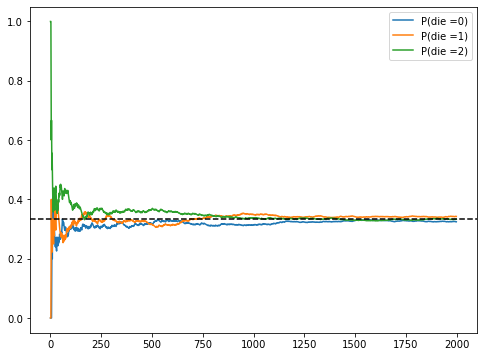

In [152]:
rolls = nd.random.multinomial(probabilities, (2000))
counts = nd.zeros((3, 2000))
totals = nd.zeros(3)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] += totals / (i+1)

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(counts[i, :].asnumpy(), label=("P(die =" + str(i) + ")"))

plt.axhline(y=0.333333, color='black', linestyle='dashed')
plt.legend()

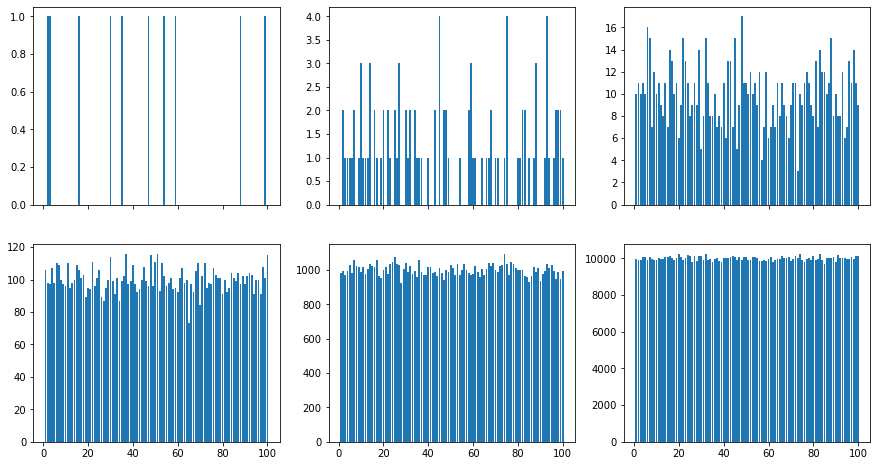

In [171]:
%matplotlib inline
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import nd
import numpy as np
import random
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes=axes.reshape(6)

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i)-1)].bar(np.arange(1, 101), counts)

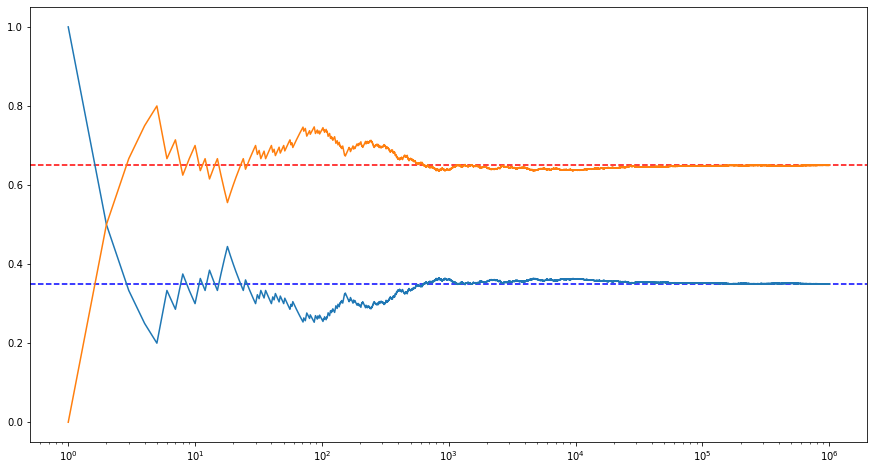

In [212]:
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)

p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x


plt.figure(figsize=(15, 8))
plt.axhline(y=0.35, color='blue', linestyle='dashed')
plt.axhline(y=0.65, color='red', linestyle='dashed')
plt.semilogx(x, p0)
plt.semilogx(x, p1)

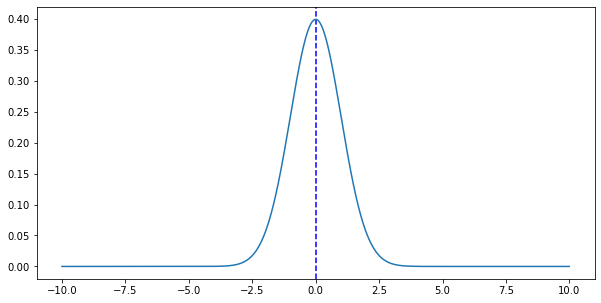

In [220]:
%matplotlib inline
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2*math.pi))*np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.axvline(x=0.0, color='blue', linestyle='--')
plt.plot(x, p)

In [31]:
A = nd.arange(12).reshape((3,-1))
print(A)
print(A.mean(axis=0))
print(A.sum(axis=0)/A.shape[0])

print(A.mean(axis=1))
print(A.sum(axis=1)/A.shape[1])

print(A.mean(axis=[0, 1]))
print(A.sum(axis=[0, 1])/(A.shape[0]*A.shape[1]))


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

[4. 5. 6. 7.]
<NDArray 4 @cpu(0)>

[4. 5. 6. 7.]
<NDArray 4 @cpu(0)>

[1.5 5.5 9.5]
<NDArray 3 @cpu(0)>

[1.5 5.5 9.5]
<NDArray 3 @cpu(0)>

[5.5]
<NDArray 1 @cpu(0)>

[5.5]
<NDArray 1 @cpu(0)>
